# Image Preprocessing and Binary Classification with Keras

## Objective

In this week's exercise, you will:
1. Learn how to do image preprocessing in Keras
2. Build a multilayer neural network for binary classification
3. Train the model on a real-world dataset of cats and dogs
4. Monitor performance using a validation dataset

---

## Step 1: Import Libraries

Let's start by importing the necessary libraries.

In [31]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, Rescaling
import matplotlib.pyplot as plt


---

## Step 2: Load and Preprocess the Data

Use `tfds.load()` to load the "cats_vs_dogs" dataset.

Find a way to split the dataset into a training and a validation set.

Also research how to apply necessary preprocessing to the data and do so (some of the preprocessing can also later be done using layers of the model).

*Note*: You can also get the dataset from other sources. However, there are some known issues with corrupted images, which then need to be addressed.

In [36]:
# TODO: load the dataset
c_v_d_train = tfds.load("cats_vs_dogs", split="train", as_supervised=True, shuffle_files=True)

## Normalize pixels
def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = image / 255.0  # Normalize to [0,1]
    return image, label

dataset = c_v_d_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

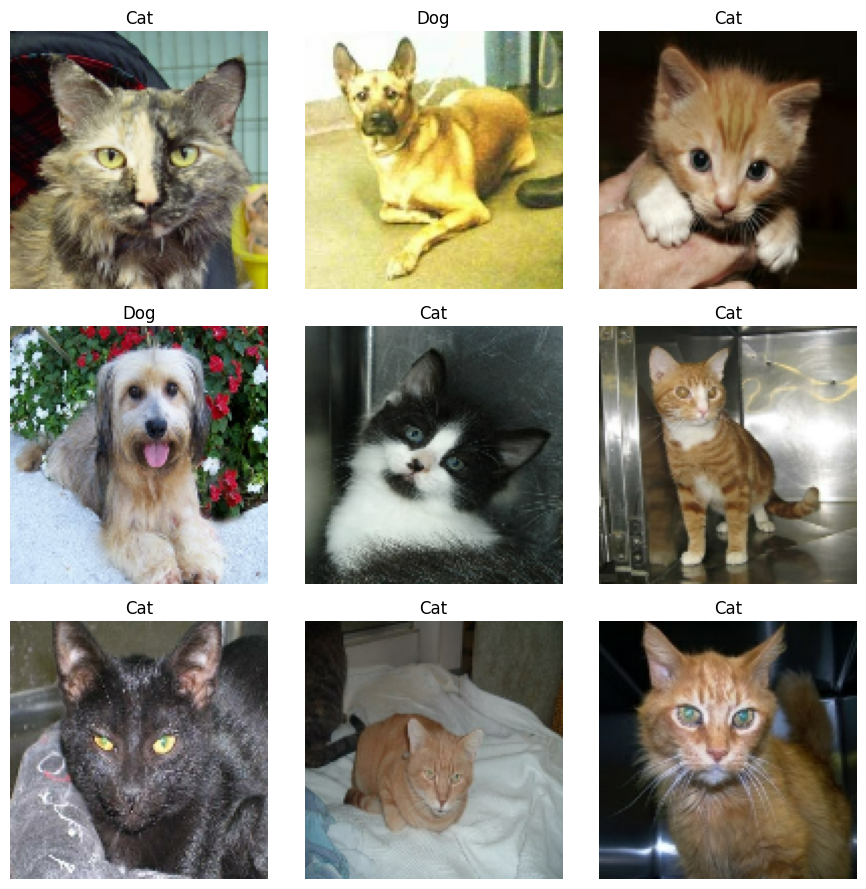

In [37]:
# Define label names
label_names = {0: "Cat", 1: "Dog"}

# Plot example
for batch_images, batch_labels in dataset.take(1):
    plt.figure(figsize=(9, 9))
    for i in range(9):
        img = batch_images[i].numpy()
        label = batch_labels[i].numpy()

        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.title(label_names[label])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

---

## Step 3: Build a Multilayer Neural Network

Build a multilayer neural network for binary classification. Apply your knowledge from the Coursera lectures to choose an adequate model architecture.

In [40]:
# TODO build a model
model = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, 3, activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Binary classification
])

# TODO compile the model

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

---

## Step 4: Train the Model

Train the model using the training dataset you created. Monitor performance during training using the validation dataset.

In [41]:
# TODO: train the model
model.fit(dataset, epochs=5)

Epoch 1/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 573s 786ms/step - accuracy: 0.6024 - loss: 0.6902
Epoch 2/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 576s 793ms/step - accuracy: 0.7366 - loss: 0.5364
Epoch 3/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 570s 784ms/step - accuracy: 0.7764 - loss: 0.4728
Epoch 4/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 617s 777ms/step - accuracy: 0.8068 - loss: 0.4233
Epoch 5/5
727/727 ━━━━━━━━━━━━━━━━━━━━ 628s 784ms/step - accuracy: 0.8324 - loss: 0.3747


---

## Step 5: Evaluate the Model

After training, you may upload some test images to evaluate your model.

In [1]:
from google.colab import files
from tensorflow.keras.preprocessing import image


def load_and_predict(model):
    uploaded_files = files.upload()

    for fn in uploaded_files.keys():
        path = '/content/' + fn
        img = image.load_img(path, target_size=(32, 32))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) / 255.0

        classes = model.predict(x)
        result = "a dog" if classes[0] > 0.5 else "a cat"

        print(f'The model predicts that the image is of {result}')

# Call the function to upload images and get predictions
load_and_predict(model)

NameError: name 'model' is not defined